In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\pga24\Capstone1\startup data.csv")

In [3]:
df.shape

(923, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [5]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## Missing value treatment

In [6]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

**Unnamed:6** - column as it is irrelevant 

**closed_at** - The missing values in the closed_at column are due to the fact that the status of the startup is 'acquired' meaning they are not closed.So we can drop closed_at column as the information getting from this column is available in another column.

In [7]:
df = df.drop(['Unnamed: 6','closed_at'], axis = 1) # dropping columns 'Unnamed: 6' & 'closed_at'

**age_first_milestone_year and age_last_milestone_year variables**

In [8]:
print(df['age_first_milestone_year'].mean())
print(df['age_first_milestone_year'].median())
print(df['age_first_milestone_year'].mode())

3.055353047989624
2.5205
0    0.0
Name: age_first_milestone_year, dtype: float64


In [9]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mode()[0])
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mode()[0])

**state_code.1 variable**

In [10]:
df['state_code.1'] = df['state_code.1'].fillna(df['state_code.1'].mode()[0])

## Data preprocessing

**state_code variable** - Checking whether the state_code and state_code.1 variables contain the same data for each row or not

In [11]:
print(df['state_code'].equals(df['state_code.1']))

True


state_code and state_code.1 variables contain the same data for each row, Therefore we can keep any one column and drop another. Lets drop 'state_code.1' column.

In [12]:
df = df.drop(['state_code.1'], axis = 1)

**founded_at variable**

In [13]:
df['founded_at'] = df['founded_at'].apply(pd.to_datetime)
df['founded_year'] = df['founded_at'].dt.strftime('%Y')

Changed the Founded_at column into a new column Founded_year

**Variables - 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year'**

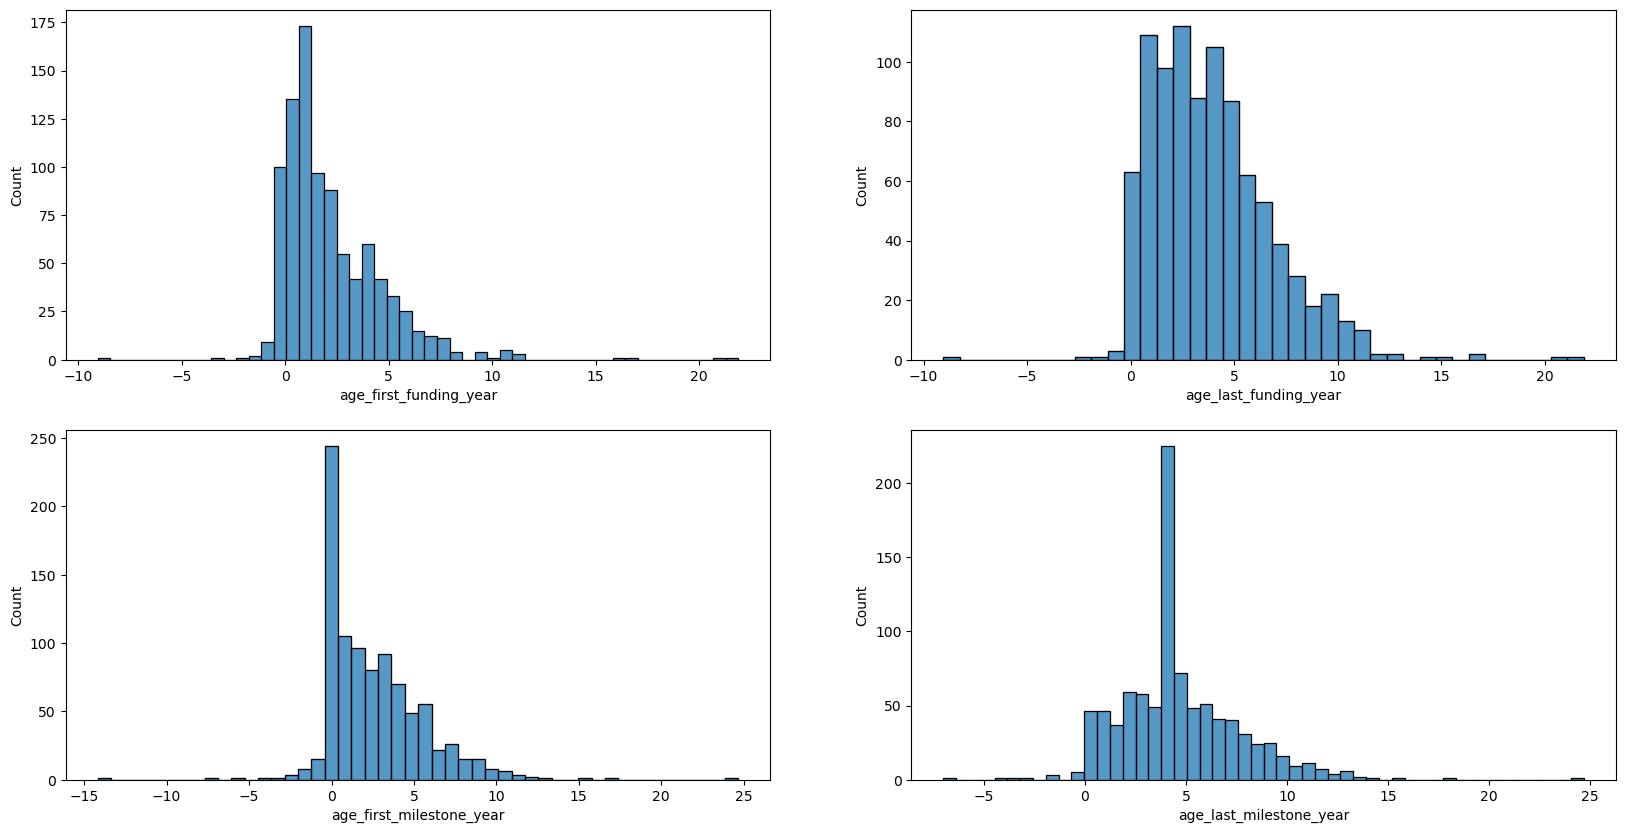

In [14]:
var = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

for k, ax in zip(range(4), axes.flatten()):
    sns.histplot(data = df, x = f'{var[k]}', ax = ax)

In [15]:
df['age_first_funding_year'] = np.where(df['age_first_funding_year']<0,0,df['age_first_funding_year'])
df['age_last_funding_year'] = np.where(df['age_last_funding_year']<0,0,df['age_last_funding_year'])
df['age_first_milestone_year'] = np.where(df['age_first_milestone_year']<0,0,df['age_first_milestone_year'])
df['age_last_milestone_year'] = np.where(df['age_last_milestone_year']<0,0,df['age_last_milestone_year'])

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2010


In [18]:
unwanted_features = ['Unnamed: 0', 'id','city', 'name','latitude', 'zip_code',  'longitude', 'founded_at', 'first_funding_at', 'last_funding_at','object_id']
df = df.drop(unwanted_features, axis=1)

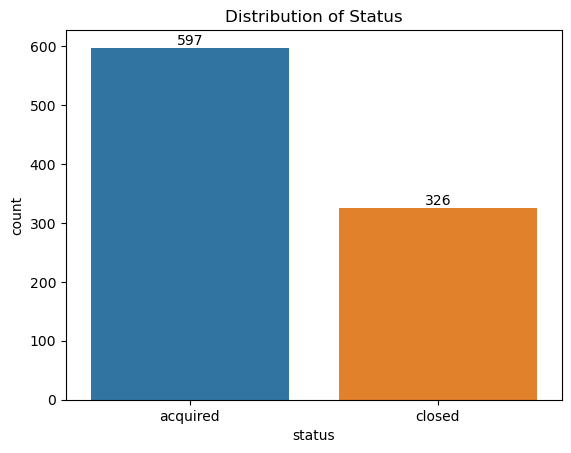

In [19]:
# Distribution of the target variable

ax = sns.countplot(x='status',data=df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('status')
plt.ylabel('count')
plt.title("Distribution of Status")
plt.show()

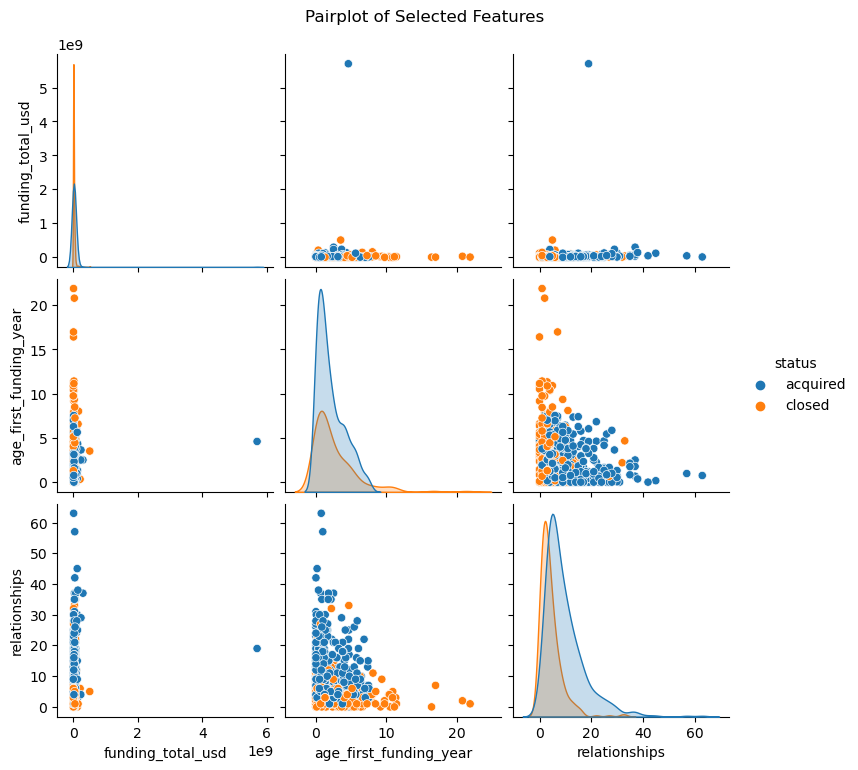

In [20]:
# Pairplot for selected features
selected_features = ['funding_total_usd', 'age_first_funding_year', 'relationships', 'status']
sns.pairplot(df[selected_features], hue='status', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

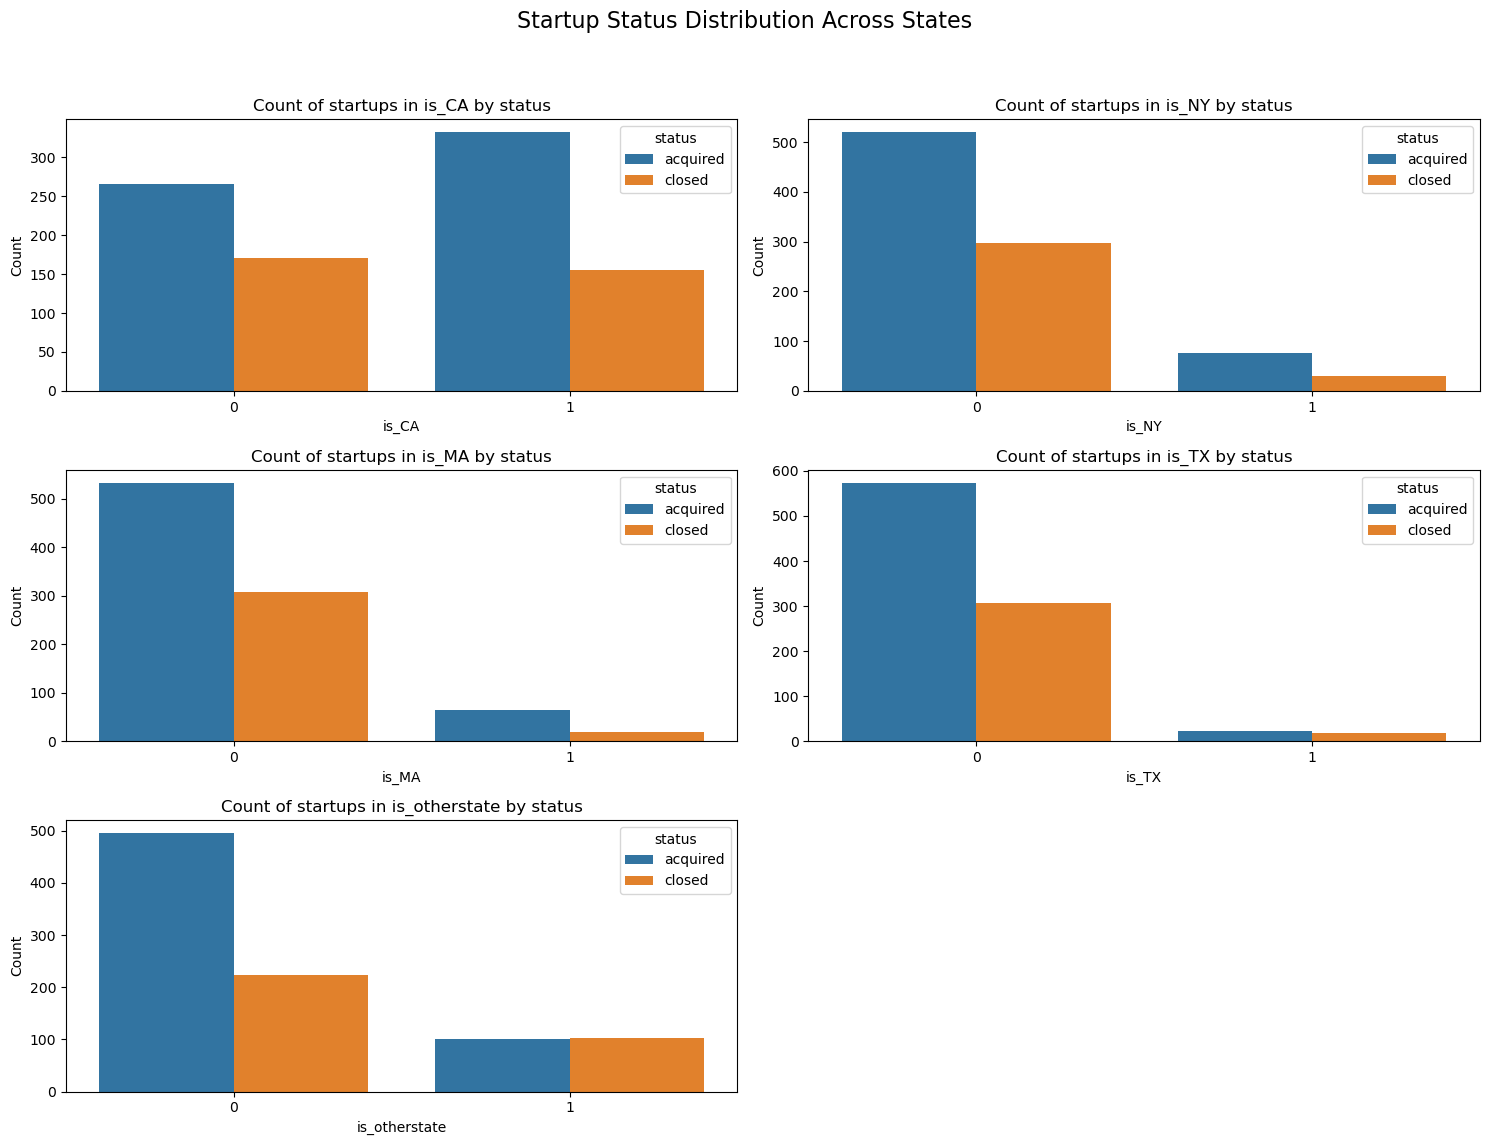

In [21]:
#Startup Status Distribution Across States

states = ['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate']

# Create subplots with multiple count plots arranged in a grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Flatten the 3x2 array of subplots for easier indexing
axes = axes.flatten()

# Loop through each state and create count plots
for i, state in enumerate(states):
    sns.countplot(x=state, hue='status', data=df, ax=axes[i])
    axes[i].set_title(f'Count of startups in {state} by status')
    axes[i].set_xlabel(state)  # Set x-axis label to the state column name
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(states), len(axes)):
    fig.delaxes(axes[j])

# Set an overall title for the entire visualization
fig.suptitle('Startup Status Distribution Across States', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the title
plt.show()


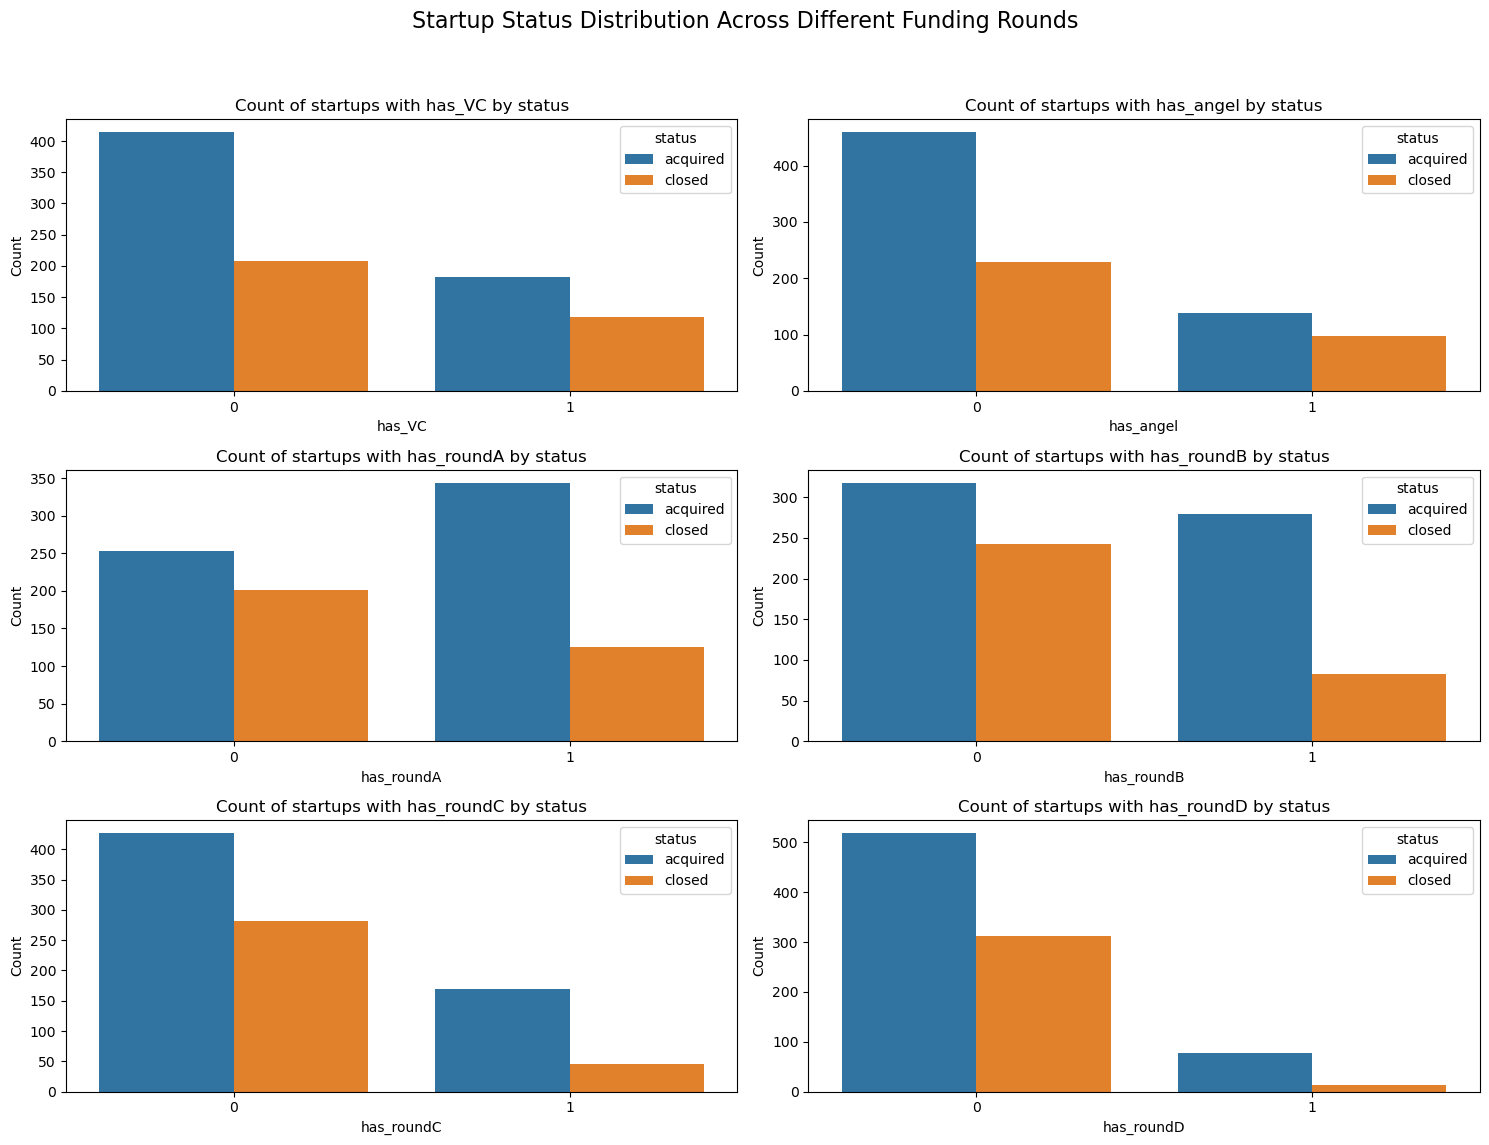

In [22]:
# Startup Status Distribution Across Different Funding Rounds

rounds = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD' ]

# Create subplots with multiple count plots arranged in a grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Flatten the 3x2 array of subplots for easier indexing
axes = axes.flatten()

# Loop through each category and create count plots
for i, fround in enumerate(rounds):
    sns.countplot(x=fround, hue='status', data=df, ax=axes[i])
    axes[i].set_title(f'Count of startups with {fround} by status')
    axes[i].set_xlabel(fround)  # Set x-axis label to the category column name
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(rounds), len(axes)):
    fig.delaxes(axes[j])

# Set an overall title for the entire visualization
fig.suptitle('Startup Status Distribution Across Different Funding Rounds', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the title
plt.show()


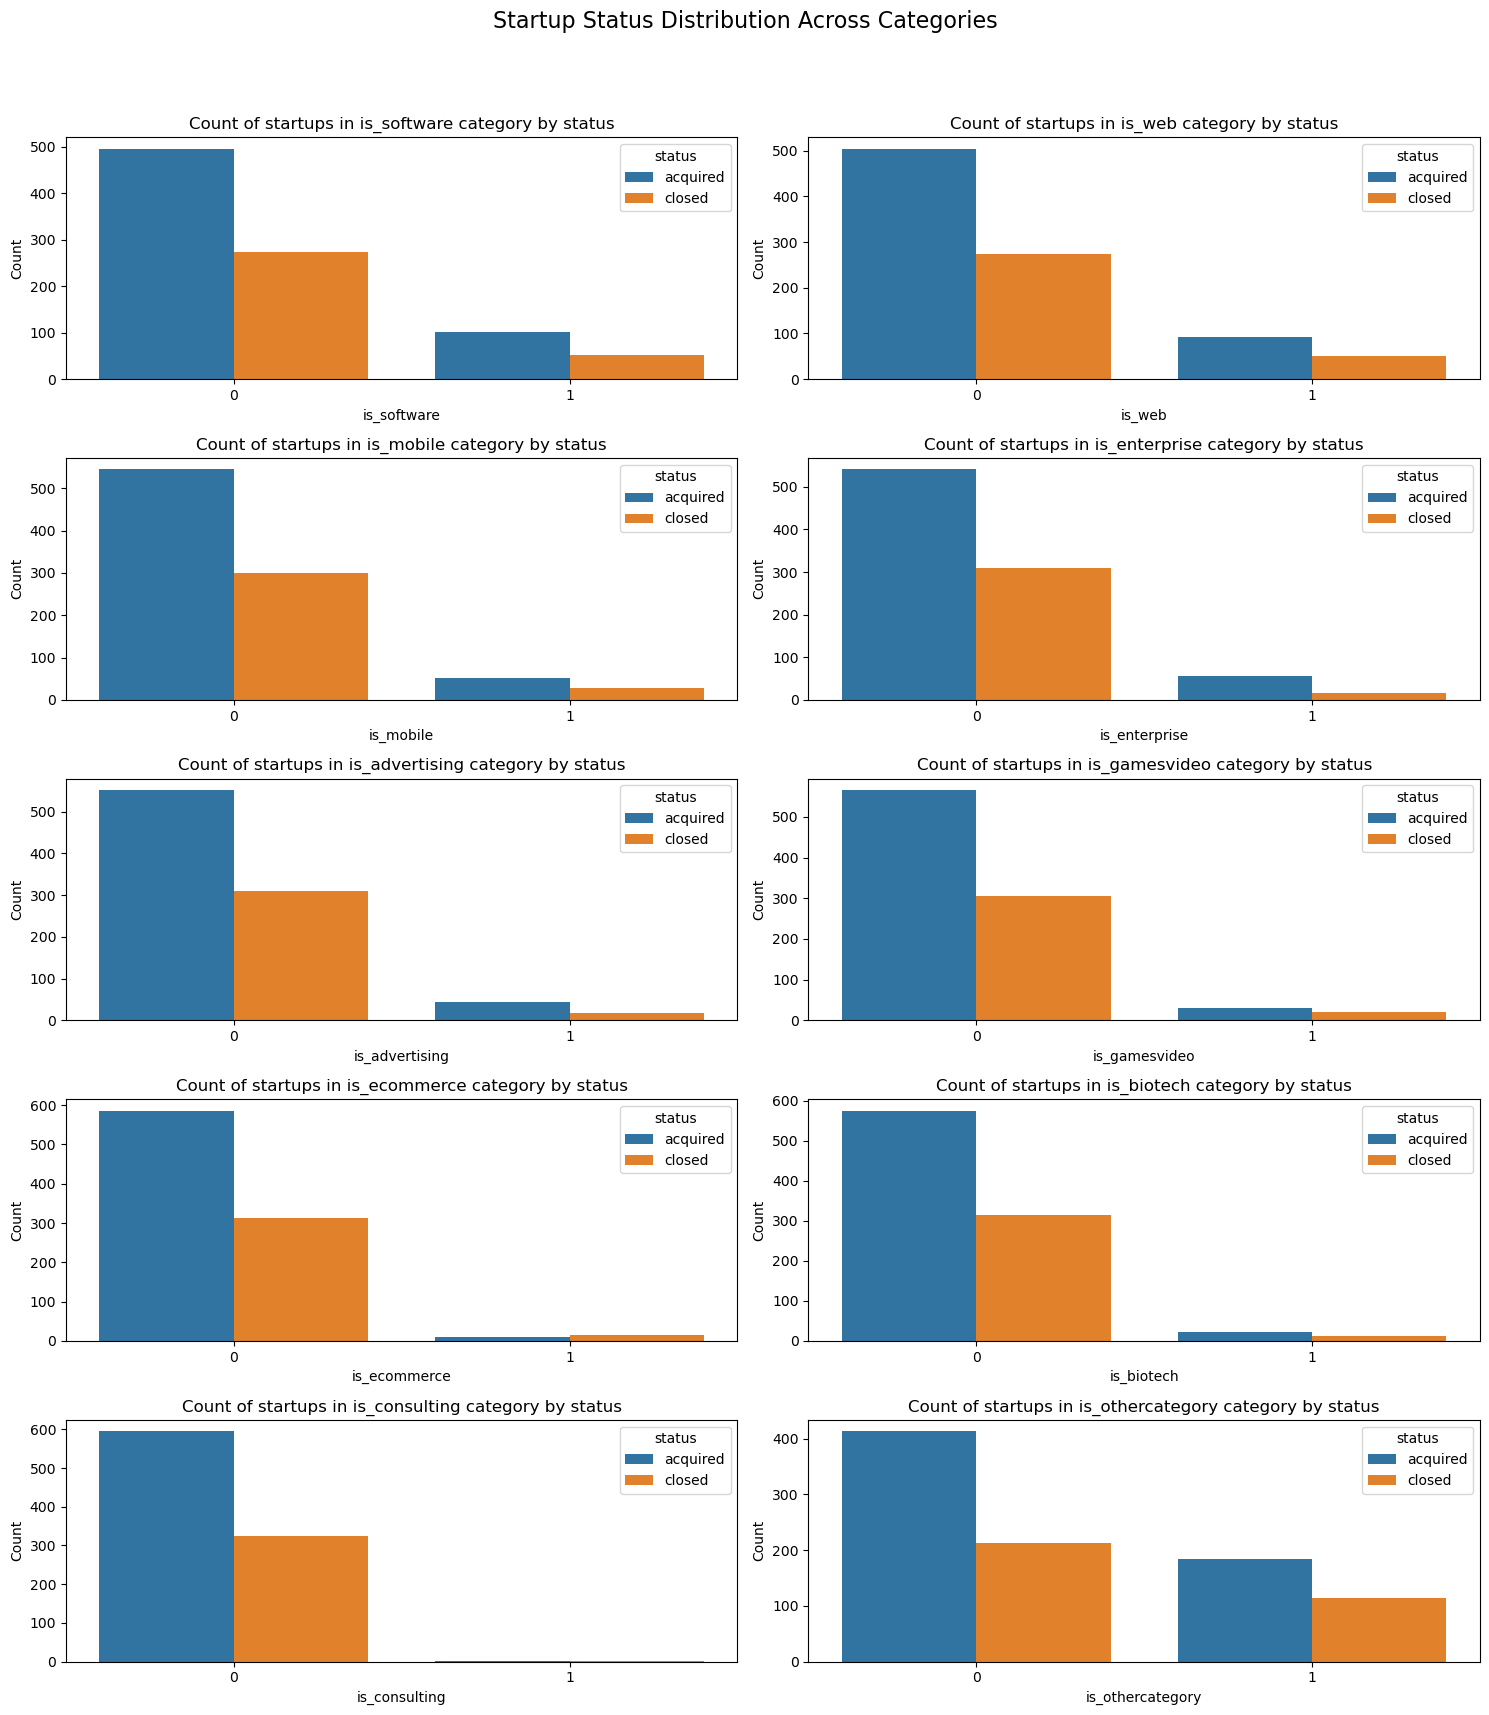

In [23]:
#Startup Status Distribution Across Categories

categories = ['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
              'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory']

# Create subplots with multiple count plots arranged in a grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Flatten the 5x2 array of subplots for easier indexing
axes = axes.flatten()

# Loop through each category and create count plots
for i, category in enumerate(categories):
    sns.countplot(x=category, hue='status', data=df, ax=axes[i])
    axes[i].set_title(f'Count of startups in {category} category by status')
    axes[i].set_xlabel(category)  # Set x-axis label to the category column name
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# Set an overall title for the entire visualization
fig.suptitle('Startup Status Distribution Across Categories', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the title
plt.show()


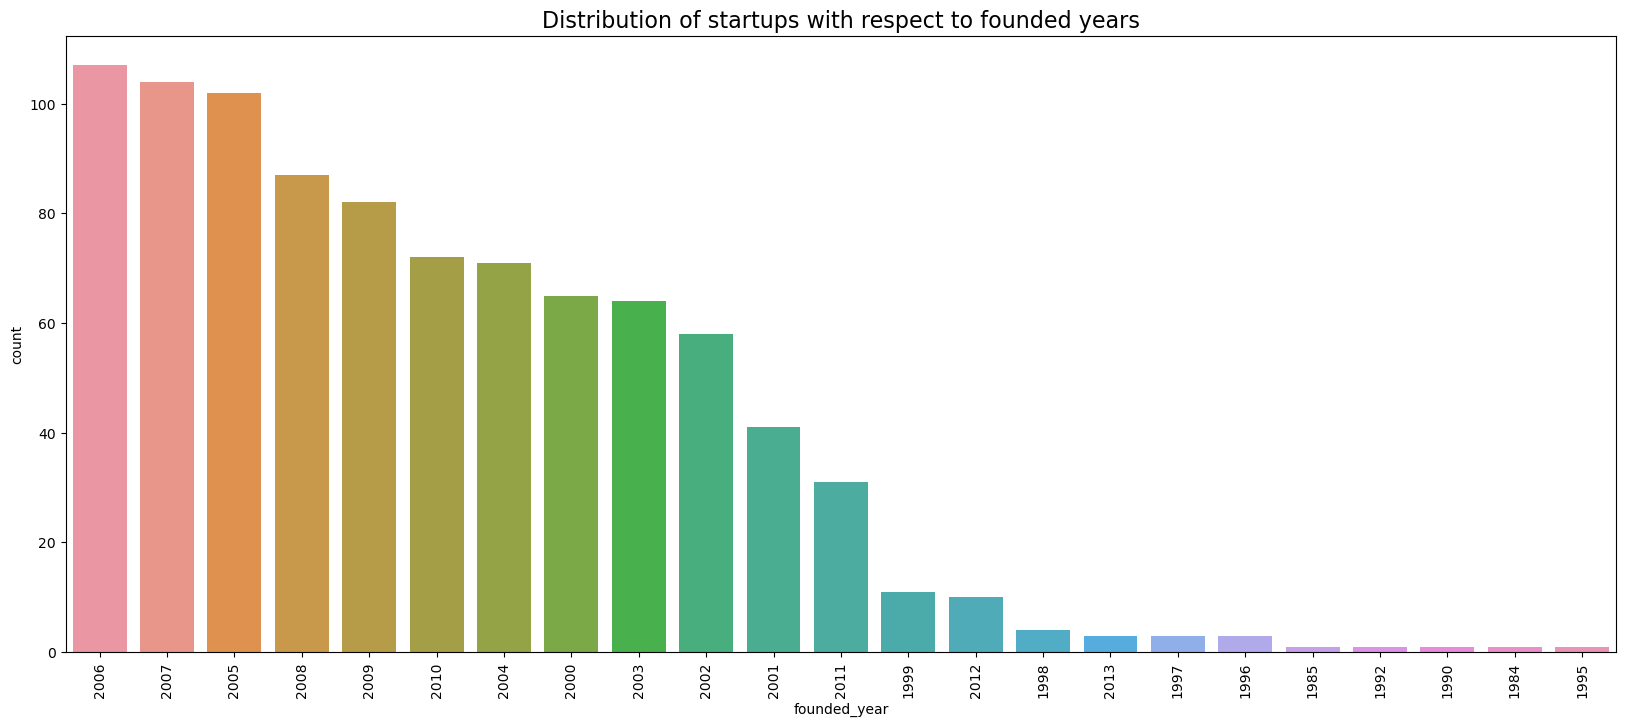

In [24]:
#Distribution of startups with respect to founded years

plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='founded_year', order=df['founded_year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of startups with respect to founded years',fontsize=16)
plt.show()

In [25]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'acquired' else 0)
df.head()

,state_code,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2010


In [26]:
uw_features = ['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising','is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory','has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate']
ddf = df.drop(uw_features, axis=1)

**Quantitative Variables summary**

In [27]:
ddf.describe(include = ['float64','int64'])

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000
mean,2.269952,3.947354,2.624127,4.657144,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317,0.646804
std,2.454950,2.930367,2.816093,2.888366,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052,0.478222
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000,0.000000
25%,0.576700,1.669850,0.000000,2.930150,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000,0.000000
50%,1.446600,3.528800,2.000000,4.002700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000,1.000000
75%,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000,1.000000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000,1.000000


**Correlation plot**

<Axes: >

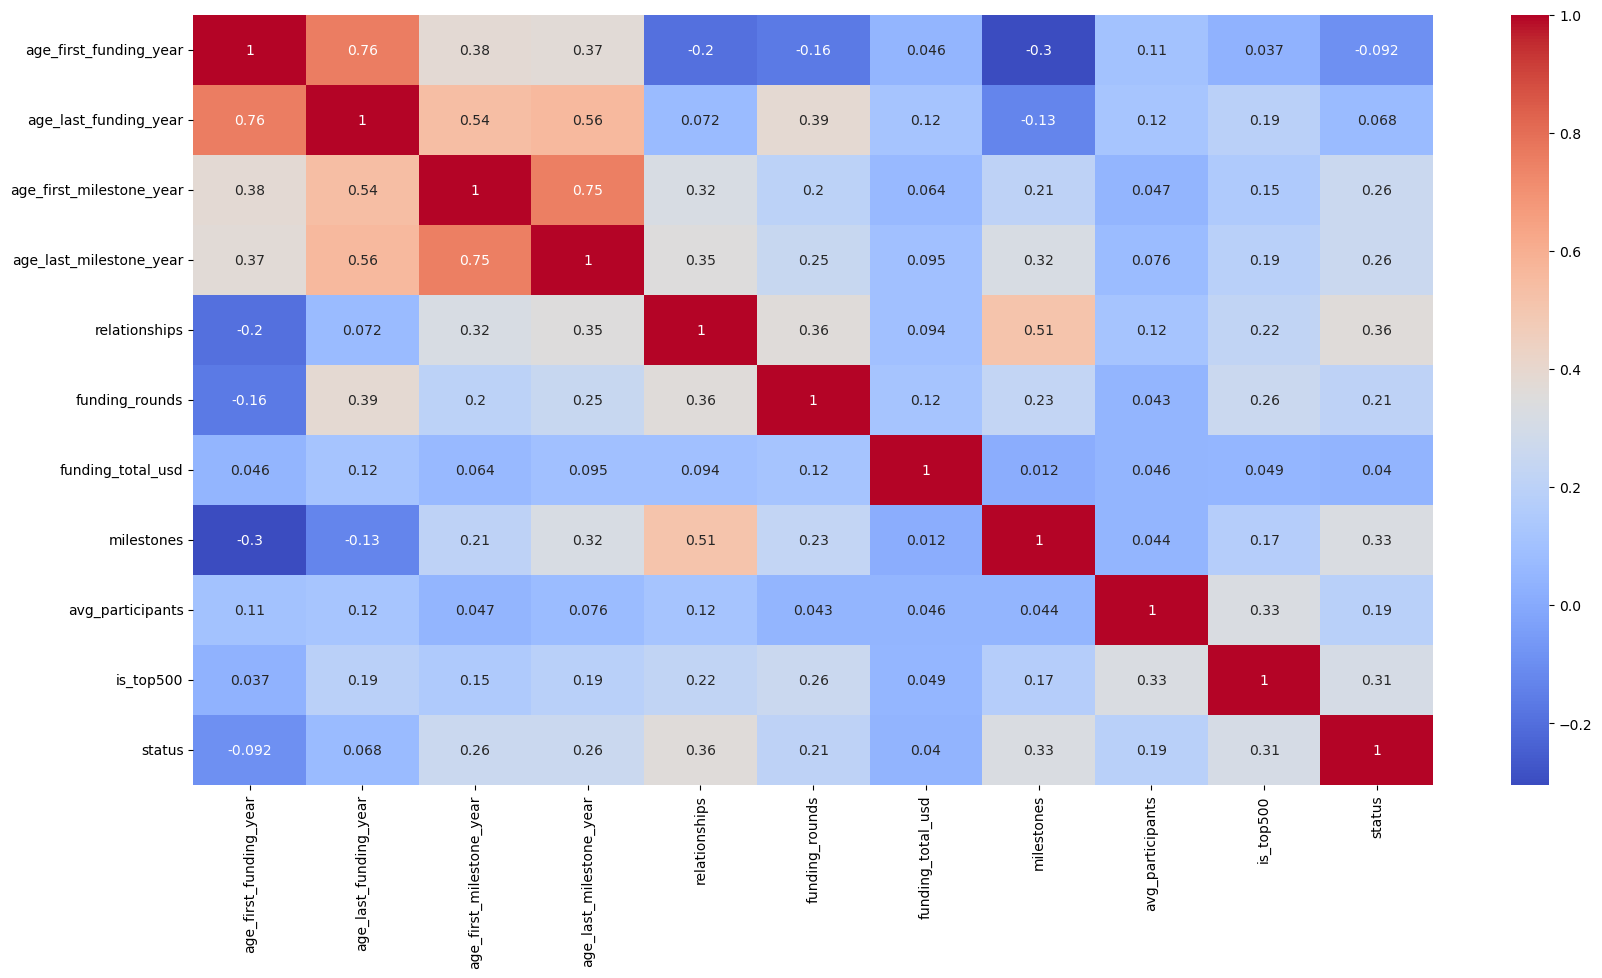

In [28]:
fig, ax = plt.subplots(figsize = (20,10))
corr = ddf.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

### Model

Logistic Regression


LR Accuracy: 0.6054054054054054

LRConfusion Matrix:
[[  0  73]
 [  0 112]]

LRClassification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.61      1.00      0.75       112

    accuracy                           0.61       185
   macro avg       0.30      0.50      0.38       185
weighted avg       0.37      0.61      0.46       185



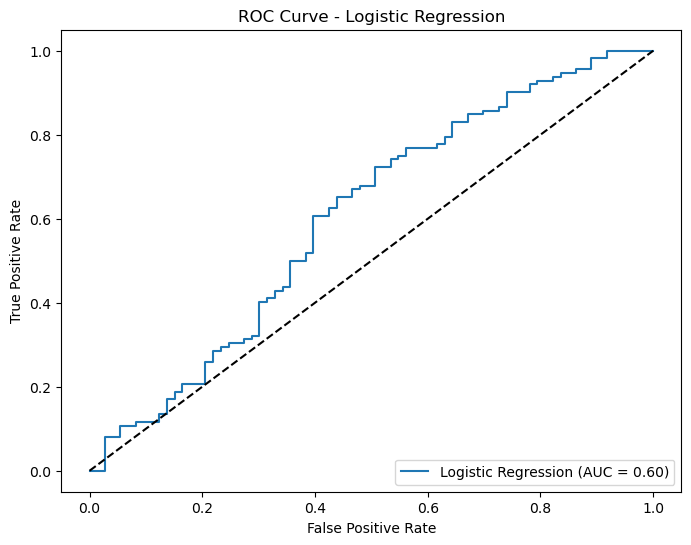

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

X = df.drop(columns=['status', 'state_code', 'category_code'])
y = df['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"\nLR Accuracy: {accuracy}")
print(f"\nLRConfusion Matrix:\n{conf_matrix}")
print(f"\nLRClassification Report:\n{classification_rep}")

# AUC-ROC Curve for Logistic Regression
y_prob_lr = model.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Best Model Accuracy: 0.7891891891891892

Best Model Confusion Matrix:
[[ 45  28]
 [ 11 101]]

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        73
           1       0.78      0.90      0.84       112

    accuracy                           0.79       185
   macro avg       0.79      0.76      0.77       185
weighted avg       0.79      0.79      0.78       185



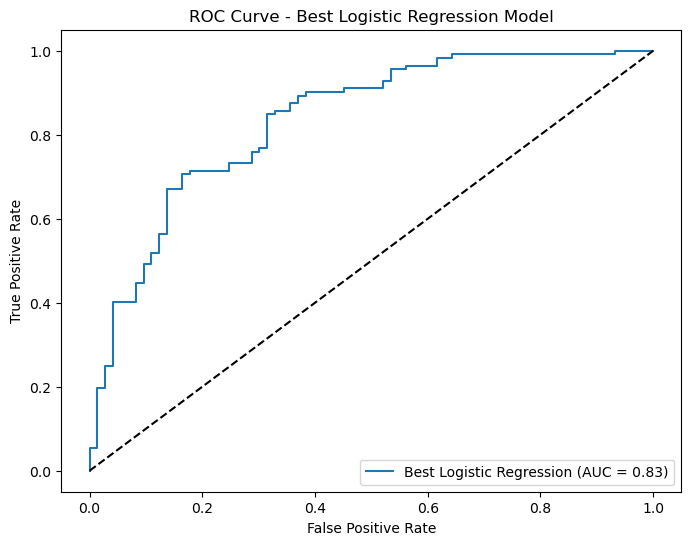

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
model = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
best_predictions = best_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_predictions)
best_conf_matrix = confusion_matrix(y_test, best_predictions)
best_classification_rep = classification_report(y_test, best_predictions)

print(f"\nBest Model Accuracy: {best_accuracy}")
print(f"\nBest Model Confusion Matrix:\n{best_conf_matrix}")
print(f"\nBest Model Classification Report:\n{best_classification_rep}")

# AUC-ROC Curve for the Best Logistic Regression Model
y_prob_best_lr = best_model.predict_proba(X_test)[:, 1]
roc_auc_best_lr = roc_auc_score(y_test, y_prob_best_lr)

fpr_best_lr, tpr_best_lr, _ = roc_curve(y_test, y_prob_best_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_lr, tpr_best_lr, label=f'Best Logistic Regression (AUC = {roc_auc_best_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


KNN


KNN Accuracy: 0.6270270270270271


KNN Confusion Matrix:
[[21 52]
 [17 95]]


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.29      0.38        73
           1       0.65      0.85      0.73       112

    accuracy                           0.63       185
   macro avg       0.60      0.57      0.56       185
weighted avg       0.61      0.63      0.59       185



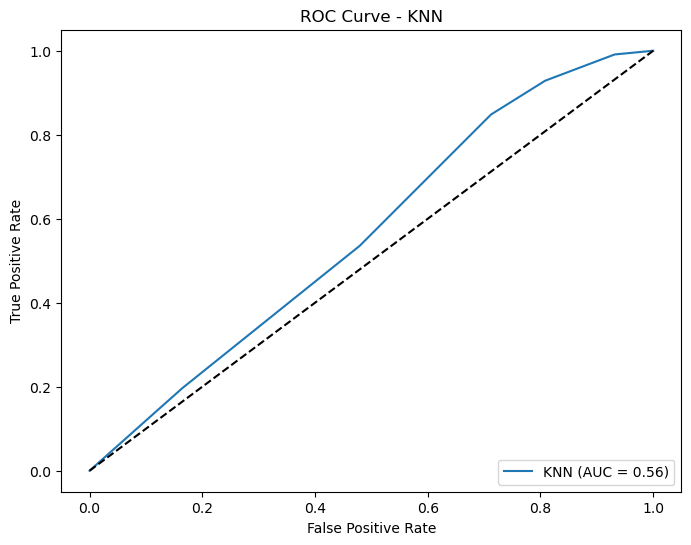

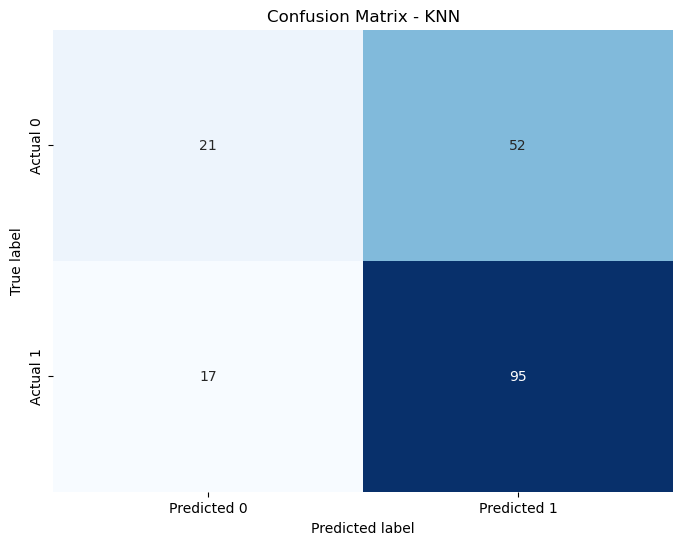

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, predictions_knn)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
classification_rep_knn = classification_report(y_test, predictions_knn)

print(f"\nKNN Accuracy: {accuracy_knn}")
print(f"\n\nKNN Confusion Matrix:\n{conf_matrix_knn}")
print(f"\n\nKNN Classification Report:\n{classification_rep_knn}")


# AUC-ROC Curve for KNN
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - KNN')
plt.show()

accuracy: 0.6270270270270271
              precision    recall  f1-score   support

           0       0.55      0.29      0.38        73
           1       0.65      0.85      0.73       112

    accuracy                           0.63       185
   macro avg       0.60      0.57      0.56       185
weighted avg       0.61      0.63      0.59       185



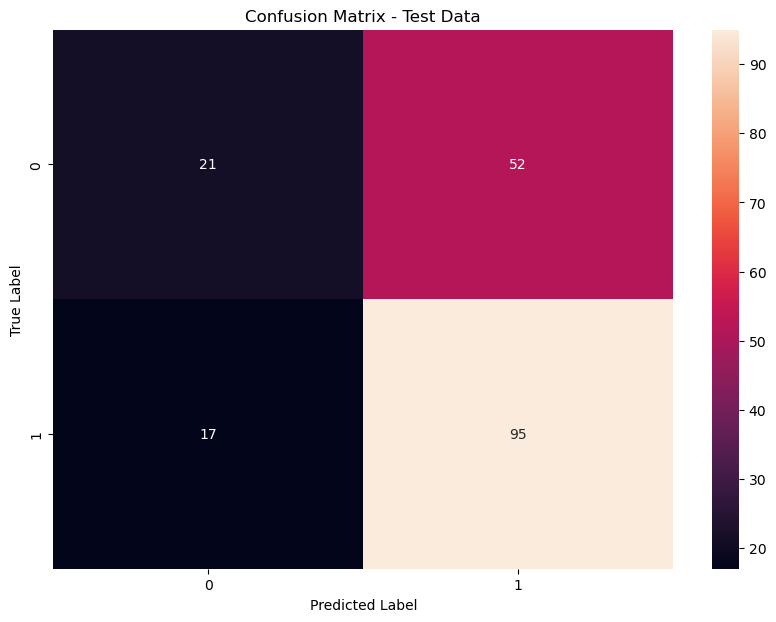

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier with 5 neighbors and using Euclidean distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train) 

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)  

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) 
print('accuracy:', accuracy)

# Print a classification report, including precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Create a confusion matrix for further evaluation
cm = confusion_matrix(y_test, y_pred)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy: 0.6162162162162163
              precision    recall  f1-score   support

           0       0.52      0.32      0.39        73
           1       0.65      0.81      0.72       112

    accuracy                           0.62       185
   macro avg       0.58      0.56      0.56       185
weighted avg       0.60      0.62      0.59       185



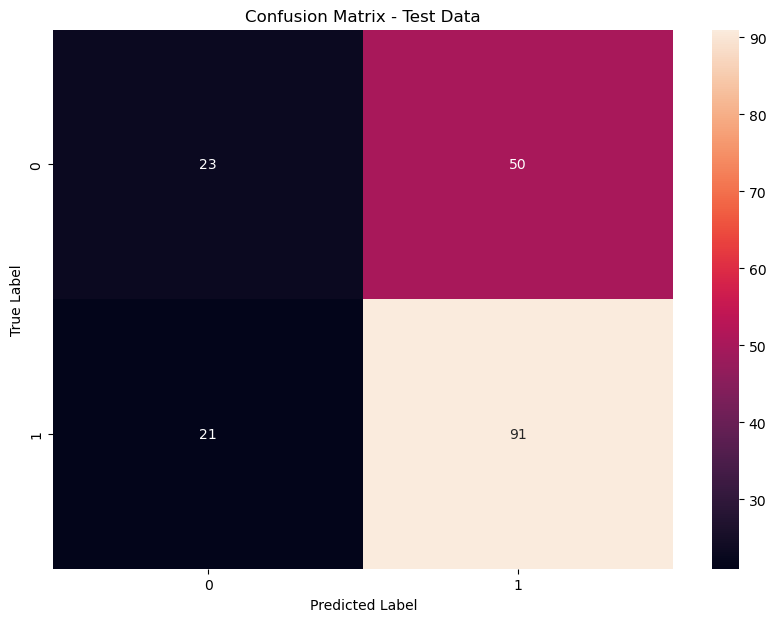

In [32]:
# Create a K-Nearest Neighbors classifier with 5 neighbors and Manhattan distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)  
print('accuracy:', accuracy)

# Print a classification report, including precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Generate a confusion matrix to evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)

# Plot a heatmap of the confusion matrix for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM


SVM Accuracy: 0.6054054054054054


SVM Confusion Matrix:
[[  0  73]
 [  0 112]]


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.61      1.00      0.75       112

    accuracy                           0.61       185
   macro avg       0.30      0.50      0.38       185
weighted avg       0.37      0.61      0.46       185



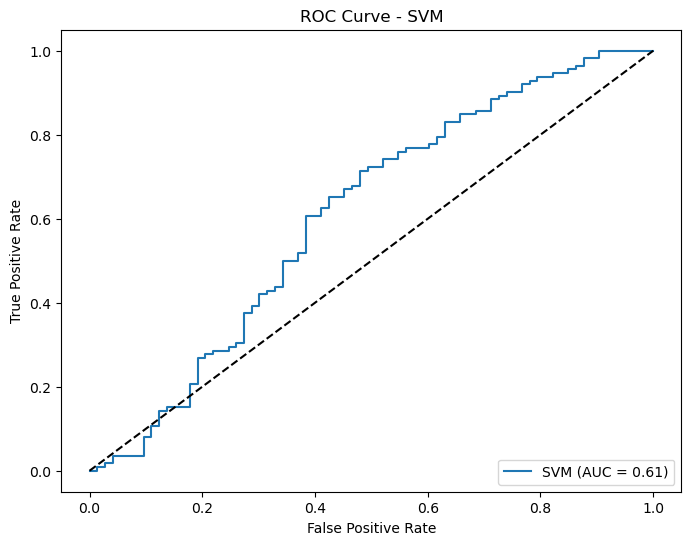

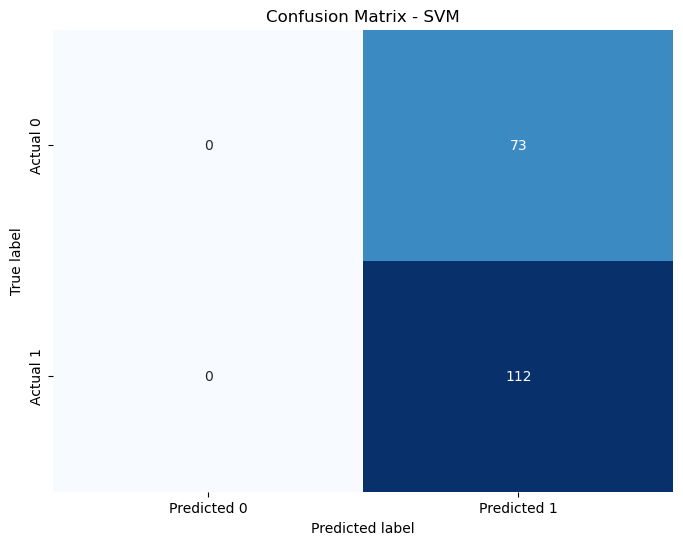

In [33]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, predictions_svm)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
classification_rep_svm = classification_report(y_test, predictions_svm)

print(f"\nSVM Accuracy: {accuracy_svm}")
print(f"\n\nSVM Confusion Matrix:\n{conf_matrix_svm}")
print(f"\n\nSVM Classification Report:\n{classification_rep_svm}")

# AUC-ROC Curve for SVM
y_prob_svm = svm_model.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - SVM')
plt.show()

Decision Tree


Decision Tree Accuracy: 0.654054054054054


Decision Tree Confusion Matrix:
[[43 30]
 [34 78]]


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        73
           1       0.72      0.70      0.71       112

    accuracy                           0.65       185
   macro avg       0.64      0.64      0.64       185
weighted avg       0.66      0.65      0.66       185



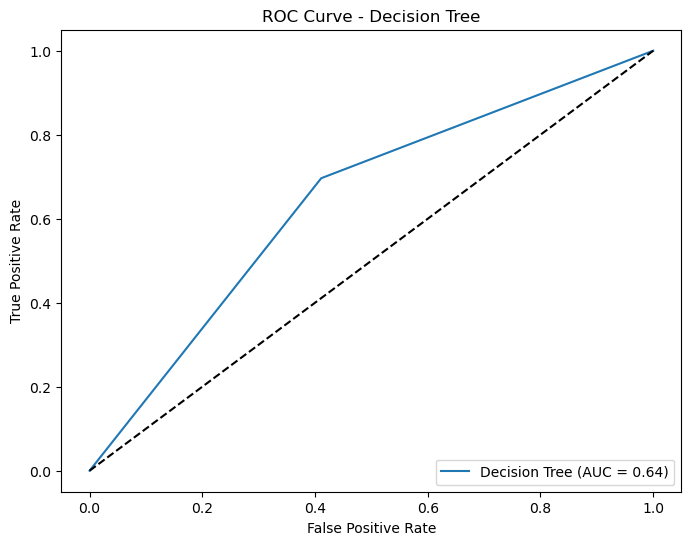

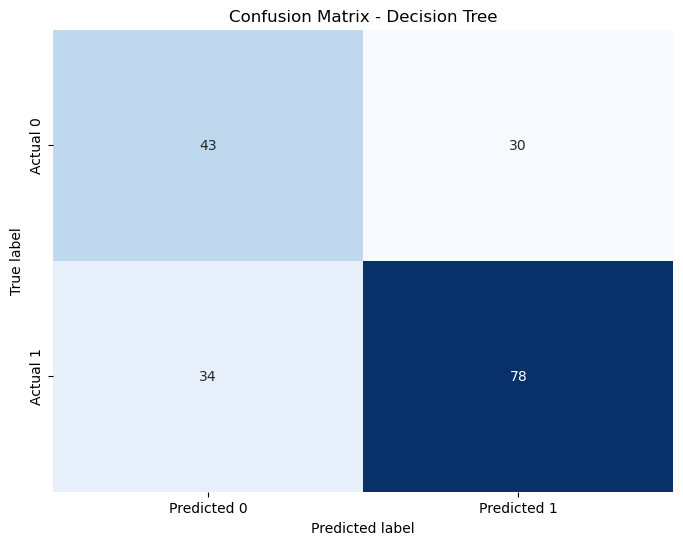

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, predictions_dt)
conf_matrix_dt = confusion_matrix(y_test, predictions_dt)
classification_rep_dt = classification_report(y_test, predictions_dt)

print(f"\nDecision Tree Accuracy: {accuracy_dt}")
print(f"\n\nDecision Tree Confusion Matrix:\n{conf_matrix_dt}")
print(f"\n\nDecision Tree Classification Report:\n{classification_rep_dt}")


# AUC-ROC Curve for Decision Tree
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Random Forest


Random Forest Accuracy: 0.8054054054054054


Random Forest Confusion Matrix:
[[ 45  28]
 [  8 104]]


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.71        73
           1       0.79      0.93      0.85       112

    accuracy                           0.81       185
   macro avg       0.82      0.77      0.78       185
weighted avg       0.81      0.81      0.80       185



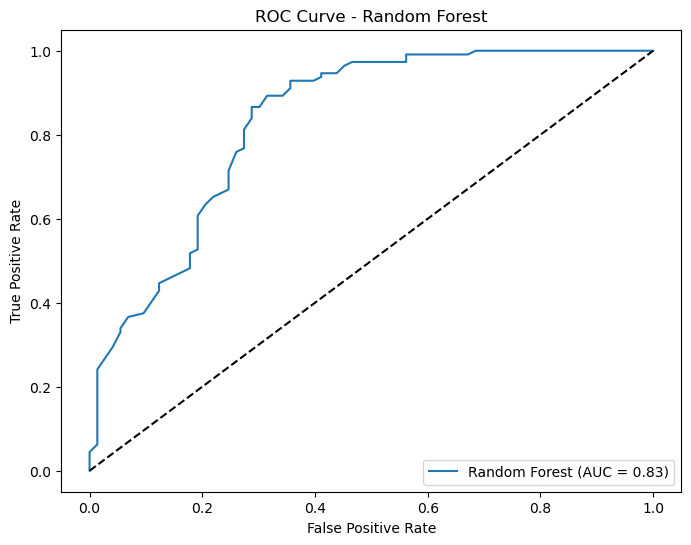

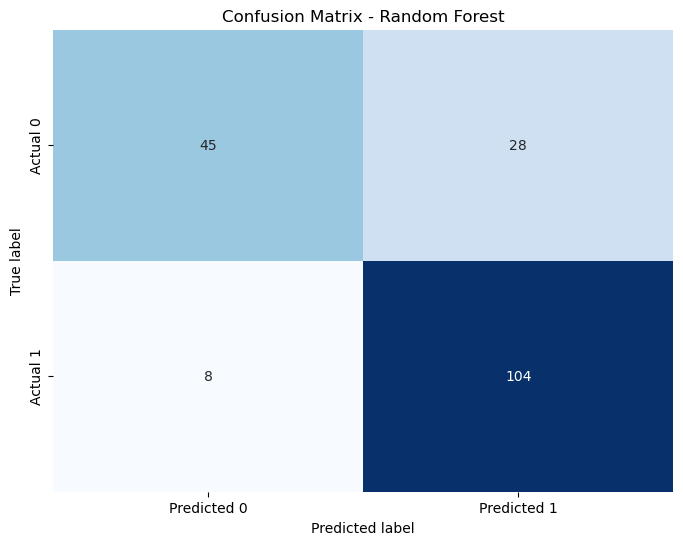

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
classification_rep_rf = classification_report(y_test, predictions_rf)

print(f"\nRandom Forest Accuracy: {accuracy_rf}")
print(f"\n\nRandom Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"\n\nRandom Forest Classification Report:\n{classification_rep_rf}")


# AUC-ROC Curve for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [55]:
# Accuracy scores for each model
accuracy_scores = [best_accuracy, accuracy_knn, accuracy_svm, accuracy_dt, accuracy_rf]
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']

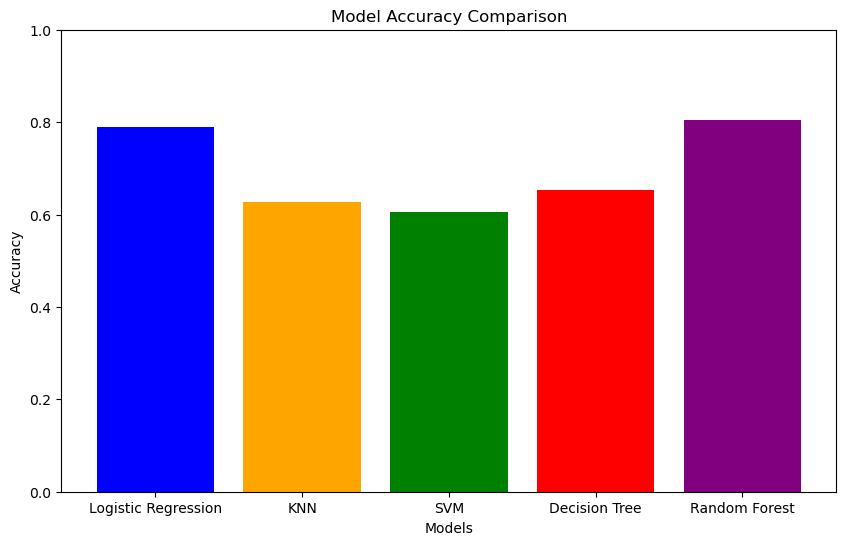

In [56]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # y-axis limit between 0 and 1 for accuracy percentage
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [57]:
# Print accuracy scores
for model, accuracy_score in zip(models, accuracy_scores):
    print(f"{model} Accuracy: {accuracy_score:.4f}")

Logistic Regression Accuracy: 0.7892
KNN Accuracy: 0.6270
SVM Accuracy: 0.6054
Decision Tree Accuracy: 0.6541
Random Forest Accuracy: 0.8054


In [58]:
df

,state_code,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1,2009
919,MA,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0,1998
920,CA,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0,1999
921,CA,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,2009
